# DS 5220 Final Project
## Music Genre Classification

Yogita Bisht

Daniel Uriel Gonzalez Quezada

In [1]:
# Core Libraries
import os
import time
import math
import glob
import json
import warnings

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Audio Processing
import librosa
import soundfile as sf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from IPython.display import clear_output, display as ipd

# Machine Learning - Scikit-learn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale
from sklearn.decomposition import PCA

# Deep Learning - TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import *

# Deep Learning - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Statistics and Distributions
from scipy.stats import loguniform, randint

# File and Image Handling
import imageio

# Kaggle Specific Libraries
import kagglehub

In [2]:
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
print("Path to dataset files:", path)

Path to dataset files: /Users/yogita/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [3]:
df = pd.read_csv('/Users/yogita/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
#Exploratory Data Analysis:

In [5]:
df.shape

(9990, 60)

In [6]:
df.isnull().any() 

filename                   False
length                     False
chroma_stft_mean           False
chroma_stft_var            False
rms_mean                   False
rms_var                    False
spectral_centroid_mean     False
spectral_centroid_var      False
spectral_bandwidth_mean    False
spectral_bandwidth_var     False
rolloff_mean               False
rolloff_var                False
zero_crossing_rate_mean    False
zero_crossing_rate_var     False
harmony_mean               False
harmony_var                False
perceptr_mean              False
perceptr_var               False
tempo                      False
mfcc1_mean                 False
mfcc1_var                  False
mfcc2_mean                 False
mfcc2_var                  False
mfcc3_mean                 False
mfcc3_var                  False
mfcc4_mean                 False
mfcc4_var                  False
mfcc5_mean                 False
mfcc5_var                  False
mfcc6_mean                 False
mfcc6_var 

In [7]:
df = df.drop(labels = "filename", axis = 1)
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [8]:
dir_ = '/Users/yogita/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data'
print(list(os.listdir(f'{dir_}/genres_original/')))

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


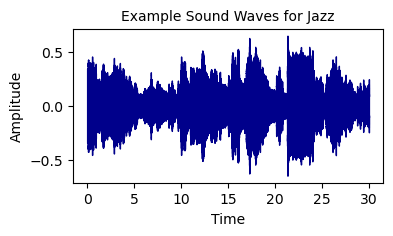

In [9]:
y, s = librosa.load(f'{dir_}/genres_original/jazz/jazz.00004.wav')
audio, _ = librosa.effects.trim(y)
plt.figure(figsize = (4, 2))
plt.ylabel('Amplitude')
librosa.display.waveshow(y = audio, sr = s, color = "#00008B");
plt.title("Example Sound Waves for Jazz", fontsize = 10);

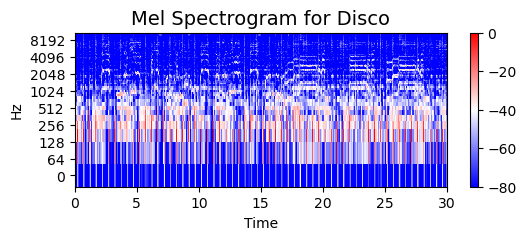

In [10]:
y, s = librosa.load(f'{dir_}/genres_original/disco/disco.00022.wav')
y, z = librosa.effects.trim(y)

fft = 2048
hl = 512

stft = np.abs(librosa.stft(audio, n_fft = fft, hop_length = hl))
mel = librosa.feature.melspectrogram(y=y, sr=s)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (6, 2))
librosa.display.specshow(mel_db, sr=s, hop_length=hl, x_axis = 'time', y_axis = 'log', cmap = 'bwr');
plt.colorbar();
plt.title("Mel Spectrogram for Disco", fontsize = 14);

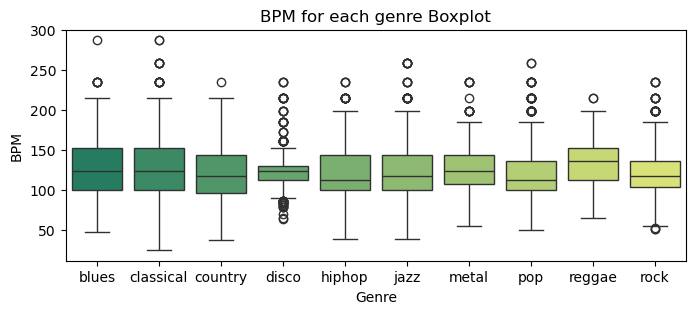

In [11]:
x = df[["label", "tempo"]]

f, ax = plt.subplots(figsize=(8, 3));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'summer', hue='label',legend=False);

plt.title('BPM for each genre Boxplot', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 10)
plt.ylabel("BPM", fontsize = 10 )
plt.show();

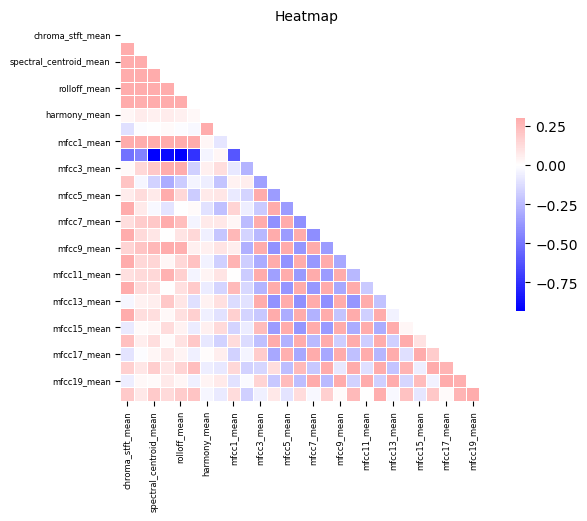

In [12]:
spike = [col for col in df.columns if 'mean' in col]
corr = df[spike].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(6, 5));

sns.heatmap(corr, mask=mask, cmap="bwr", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap' , fontsize=10)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6);

In [13]:
df = df.iloc[0:, 1:]
y = df['label']
X = df.loc[:, df.columns != 'label']

cols = X.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

pca = PCA(n_components=2)
scaled_df = pca.fit_transform(X)
df_p = pd.DataFrame(data = scaled_df, columns = ['pca1', 'pca2'])

fdf = pd.concat([df_p, y], axis = 1)

pca.explained_variance_ratio_

array([0.26745621, 0.18238003])

Text(0, 0.5, 'Principal Component 2')

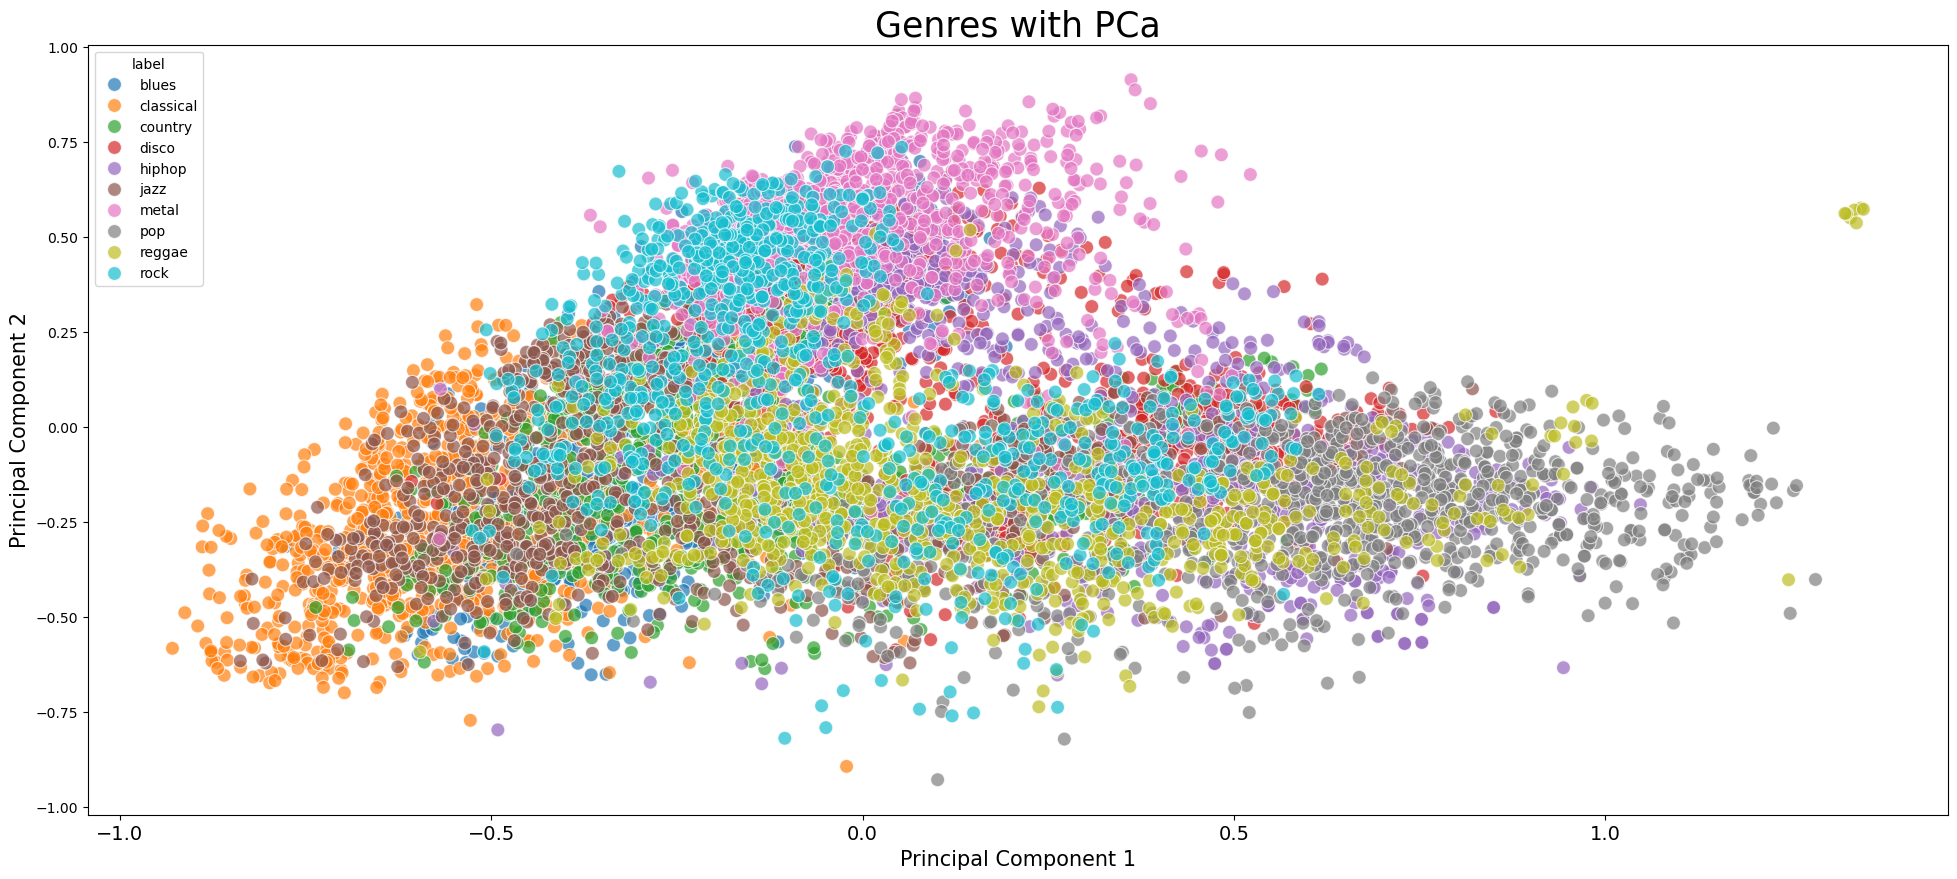

In [14]:
plt.figure(figsize = (24,10))
sns.scatterplot(x = "pca1", y = "pca2", data = fdf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('Genres with PCa', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

## Prediction using Random Forest

In [61]:
# First experiment: using three features extracted from data: MFFCs, Spectral Centroid, and Chroma.

def extract_features(file_path):
    """
    Extracts audio features from a given audio file.

    The function extracts MFCCs, spectral centroid, and chroma features from
    the input audio file. For each feature, it calculates summary statistics
    (mean, standard deviation, maximum, and minimum) and combines them into
    a single feature vector.

    Parameters
    ----------
    file_path : str
        Path to the audio file from which to extract features.

    Returns
    -------
    list or None
        A list containing the extracted features (mean, standard deviation,
        maximum, and minimum) for MFCCs, spectral centroid, and chroma features.
        Returns `None` if an error occurs during feature extraction.

    Notes
    -----
    - The function uses the `librosa` library to process audio data.
    - Only the first 30 seconds of the audio file are processed.
    - Ensure that the audio file is in a supported format and `librosa` is properly
      installed before using this function.

    Examples
    --------
    >>> features = extract_features("example_audio.wav")
    >>> print(features)
    [12.34, 0.56, 15.78, 10.23, 0.67, 0.45, ...]  # Example output

    """
    try:
        # Load audio file
        audio, sr = librosa.load(file_path, duration=30)

        # Extract features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

        # Calculate statistics
        features = []
        for feature in [mfccs, spectral_centroid, chroma]:
            features.extend([
                np.mean(feature),
                np.std(feature),
                np.max(feature),
                np.min(feature)
            ])

        return features
    except Exception as e:
        print(f"Error extracting features from {file_path}: {str(e)}")
        return None

In [63]:
# Extracting features from all files

def process_data(data_path):
    """
    Processes audio files in a dataset and extracts features and labels.

    This function iterates through genre folders in the specified dataset
    directory, processes each `.wav` file, extracts audio features, and
    associates them with their corresponding genre labels.

    Parameters
    ----------
    data_path : str
        Path to the root directory of the dataset. Each subdirectory in this
        path is assumed to represent a genre and contains `.wav` audio files.

    Returns
    -------
    tuple of numpy.ndarray
        - `features`: A 2D NumPy array where each row corresponds to the
          extracted feature vector of an audio file.
        - `labels`: A 1D NumPy array containing the genre label for each
          audio file, as strings.

    Notes
    -----
    - Only files with the `.wav` extension are processed.
    - Ensure the dataset directory is structured with subdirectories for
      each genre, each containing `.wav` audio files.
    - This function depends on the `extract_features` function for feature
      extraction.

    Examples
    --------
    >>> features, labels = process_data("path/to/dataset")
    >>> print(features.shape, labels.shape)
    (1000, 39) (1000,)

    """
    features = []
    labels = []

    # Process each genre folder
    for genre in os.listdir(data_path):
        genre_path = os.path.join(data_path, genre)
        if os.path.isdir(genre_path):
            print(f"Processing {genre} files...")

            # Process each audio file in the genre folder
            for file_name in os.listdir(genre_path):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(genre_path, file_name)
                    extracted_features = extract_features(file_path)

                    if extracted_features:
                        features.append(extracted_features)
                        labels.append(genre)

    return np.array(features), np.array(labels)

In [65]:
def train_model_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize and train the model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate the model
    y_pred = clf.predict(X_test)
    print("\nModel Performance:")
    print(classification_report(y_test, y_pred))

    return clf, X_test, y_test

In [67]:
def predict_genre(model, file_path):
    """Predict the genre of a single audio file"""
    features = extract_features(file_path)
    if features:
        features = np.array(features).reshape(1, -1)
        prediction = model.predict(features)
        probabilities = model.predict_proba(features)

        # Get top 3 predictions with probabilities
        top_3 = np.argsort(probabilities[0])[-3:][::-1]
        genres = model.classes_[top_3]
        probs = probabilities[0][top_3]

        return list(zip(genres, probs))
    return None

In [69]:
DATA_PATH = '/Users/yogita/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original'

# Process all files
print("Extracting features from audio files...")
X, y = process_data(DATA_PATH)

# Train the model
print("\nTraining the model...")
model, X_test, y_test = train_model_random_forest(X, y)

# Example prediction
test_file = DATA_PATH+r"/metal/metal.00009.wav"
print("\nPredicting genre for test file...")
predictions = predict_genre(model, test_file)

if predictions:
    print("\nTop 3 predicted genres:")
    for genre, prob in predictions:
        print(f"{genre}: {prob:.2%}")

Extracting features from audio files...
Processing pop files...
Processing metal files...
Processing disco files...
Processing blues files...
Processing reggae files...
Processing classical files...
Processing rock files...
Processing hiphop files...
Processing country files...
Processing jazz files...


/var/folders/01/g4v7wr_x7dsdhgj2dsm_xb1r0000gn/T/ipykernel_53156/252073875.py:40: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, duration=30)
/opt/anaconda3/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error extracting features from /Users/yogita/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00054.wav: 

Training the model...

Model Performance:
              precision    recall  f1-score   support

       blues       0.56      0.45      0.50        22
   classical       0.89      0.86      0.87        28
     country       0.64      0.64      0.64        22
       disco       0.54      0.29      0.38        24
      hiphop       0.58      0.55      0.56        20
        jazz       0.50      0.63      0.56        19
       metal       0.61      0.92      0.73        12
         pop       0.68      0.71      0.70        21
      reggae       0.53      0.67      0.59        15
        rock       0.17      0.18      0.17        17

    accuracy                           0.58       200
   macro avg       0.57      0.59      0.57       200
weighted avg       0.59      0.58      0.58       200


Predicting genre

### Experiment using more features and 3 second intervals.

The dataset offers a nice feature selection for the music files, which can be used to train several classifiers.

In [72]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 314159)

We use a numerical encoder for the labels, i.e. a map from genres to integers.

In [ ]:
labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

In [ ]:
Some algorithms, such as SVM, are sensible to the features' magnitudes. Therefore, we can perform a z-score normalization.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
First, we try again with a RF classifier using the new features

In [ ]:
train_model_random_forest(X, y)

## Finding a better Random Forest

Now, we wil do a randomized Cross-Validation search

In [ ]:
# We define the parameter distribution
param_dist_rf = {
    'n_estimators': randint(10, 101),  # Reduced upper limit for faster computation
    'max_features': ['auto', 'sqrt'],  # Simplified choice of max features
    'max_depth': randint(25, 31),  # Controlled tree depth
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Consistent use of bootstrapping
}

In [ ]:
# Create the Random Forest classifier and randomized search object
rf = RandomForestClassifier()
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf, n_iter=50, 
    scoring='accuracy', n_jobs=-1 # The goal is to get the best accuracy
)

In [ ]:
random_search_rf.fit(X_train, y_train)

# Evaluate the Random Forest model with the best parameters on the test set
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Evaluate the Random Forest model on the training set
y_train_pred_rf = best_rf.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

print("Train RF Accuracy:", train_accuracy_rf)
print("Test RF Accuracy:", test_accuracy_rf)

print(classification_report(y_test, y_pred_rf))

## Classification using Support Vector Machines

In [ ]:
We perform a similar process using SVM.

In [ ]:
# Define the parameter distribution for SVM
param_dist_svm = {
    'C': loguniform(1e-4, 1e+1),  # Narrower range for C
    'kernel': ['linear', 'rbf'],  # Only linear and RBF kernels
    # 'gamma': loguniform(1e-4, 1e-3)  # Consider removing if using a linear kernel
}

# Create the SVM classifier and randomized search object
svm = SVC(random_state=42)
random_search_svm = RandomizedSearchCV(
    svm, param_distributions=param_dist_svm, n_iter=50,  # Reduced number of iterations
    scoring='accuracy', n_jobs=-1, random_state=42  # Use all available cores
)

# Fit the randomized search to the data
random_search_svm.fit(X_train, y_train)

# Evaluate the SVM model with the best parameters on the test set
best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Evaluate the SVM model on the training set
y_train_pred_svm = best_svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

print("Train SVM Accuracy:", train_accuracy_svm)
print("Test SVM Accuracy:", test_accuracy_svm)

print(classification_report(y_test, y_pred_svm))

## Music generation using Variational Autoencoders

In [ ]:
df.columns

In [ ]:
df_30 = pd.read_csv( "/Users/yogita/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/features_30_sec.csv")
df_30

In [ ]:
df_rock = df_30.loc[df_30["label"] == "rock"]
feature_cols = [f"mfcc{i}_mean" for i in range(1,21)]
feature_columns = [col for col in df_30.columns if col in feature_cols]
X = df_rock[feature_cols].values
print(X)


# Escalar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Convertir a tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Crear DataLoader
train_loader = torch.utils.data.DataLoader(X_train, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(X_test, batch_size=32)

# Modelo: Autoencoder
class TabularAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(TabularAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed

# Dimensiones
input_dim = X_train.shape[1]
latent_dim = 32  # Ajusta según la necesidad

# Inicializar modelo
model = TabularAutoencoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento
def train(model, data_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in data_loader:
            optimizer.zero_grad()
            outputs = model(batch)
            loss = criterion(outputs, batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(data_loader)}")

train(model, train_loader, criterion, optimizer, epochs=100)

# Generar nuevas características
def generate_features(model, latent_dim, n_samples=10):
    model.eval()
    latent_samples = torch.randn(n_samples, latent_dim)
    generated_features = model.decoder(latent_samples).detach().numpy()
    return generated_features

# Generar nuevos ejemplos
generated_data = generate_features(model, latent_dim=latent_dim, n_samples=500)
#print("Generated Features:\n", generated_data)

In [ ]:
def reconstruct_audio_from_mfcc(mfcc_features, sr=3000, n_mfcc=20):
    """
    Reconstruye un archivo de audio a partir de MFCCs.
    """
    # Generar espectrograma inverso desde los MFCCs
    reconstructed_signal = librosa.feature.inverse.mfcc_to_audio(
        mfcc_features.T,  # Necesita ser transpuesta
        sr=sr
    )
    return reconstructed_signal

# Supongamos que `generated_features` contiene los MFCCs generados
generated_mfcc = generated_data[:, :20]  # Solo selecciona los MFCCs
audio_signal = reconstruct_audio_from_mfcc(generated_mfcc)

# Guardar el archivo de audio
#sf.write("reconstructed_audio.wav", audio_signal, samplerate=3000)

# Reproducir el audio (opcional)
import IPython.display as ipd
ipd.Audio(audio_signal, rate=3000)

## CNN

In [ ]:
# Feature Extraction and scaling

class_list = df.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)

fit = StandardScaler()
x = fit.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

x_train.shape, x_test.shape
y_train.shape, y_test.shape

In [32]:
DATASET_PATH = '/Users/yogita/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original'
JSON_PATH = "datafile.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath != dataset_path:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print(semantic_label)
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                
                # Check if the file format is supported
                try:
                    sf.info(file_path)
                except:
                    print(f"Skipping file {file_path} due to unsupported format.")
                    continue
                
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                for d in range(num_segments):
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    mfcc = librosa.feature.mfcc(y = signal[start:finish], sr = sample_rate, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
                    mfcc = mfcc.T
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
    
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)

save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 15)

pop
metal
disco
blues
reggae
classical
rock
hiphop
country
jazz
Skipping file /Users/yogita/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00054.wav due to unsupported format.


In [36]:
def prepare_datasets(test_size, validation_size):
    x, y, z = load_data(DATA_PATH)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, shuffle = True,random_state =42)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=1, shuffle = True, random_state = 42)

    # add an axis to input sets
    x_train = x_train[..., np.newaxis]
    x_validation = x_validation[..., np.newaxis]
    x_test = x_test[..., np.newaxis]

    return x_train, x_validation, x_test, y_train, y_validation, y_test, z

In [38]:
DATA_PATH = "./datafile.json"
def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    x = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return x, y, z

In [40]:
#Model development

def build_model(input_shape):
    model = Sequential()
    
    #1st conv layer
    model.add(Conv2D(32, (2, 2), activation='relu', input_shape=input_shape, kernel_initializer = 'he_normal'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())

    # 2nd conv layer
    model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer = 'he_normal'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    
    # 3rd conv layer
    model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer = 'he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer = 'he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer = 'he_normal'))
    model.add(Dropout(0.5))
    
    # output layer
    model.add(Dense(10, activation='softmax'))
    return model
    
x_train, x_validation, x_test, y_train, y_validation, y_test, z = prepare_datasets(0.1, 0)
input_shape = (x_train.shape[1], x_train.shape[2], 1)
model = build_model(input_shape)
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 86, 12, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 43, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 43, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 5, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 3, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 3, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 2, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,794 (229.66 KB)

 Trainable params: 58,602 (228.91 KB)

 Non-trainable params: 192 (768.00 B)

In [41]:
def predict(model, x, y):
    
    x = x[np.newaxis, ...]
    prediction = model.predict(x)
    predicted_index = np.argmax(prediction, axis = 1)
    target = z[y]
    predicted = z[predicted_index]

    print("\nActual Label: {}\nPredicted Label: {}".format(target, predicted))

optimiser = optimizers.Adam(learning_rate=0.0025)
model.compile(optimizer = optimiser, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 512, epochs = 75, verbose = 2)

Epoch 1/75
27/27 - 4s - 140ms/step - accuracy: 0.2213 - loss: 2.5393 - val_accuracy: 0.2316 - val_loss: 2.6362
Epoch 2/75
27/27 - 3s - 124ms/step - accuracy: 0.3379 - loss: 1.8115 - val_accuracy: 0.2196 - val_loss: 2.1326
Epoch 3/75
27/27 - 4s - 147ms/step - accuracy: 0.4115 - loss: 1.6237 - val_accuracy: 0.2864 - val_loss: 2.0511
Epoch 4/75
27/27 - 4s - 142ms/step - accuracy: 0.4525 - loss: 1.4984 - val_accuracy: 0.3591 - val_loss: 1.7803
Epoch 5/75
27/27 - 4s - 143ms/step - accuracy: 0.4849 - loss: 1.4179 - val_accuracy: 0.4413 - val_loss: 1.6314
Epoch 6/75
27/27 - 4s - 147ms/step - accuracy: 0.5211 - loss: 1.3318 - val_accuracy: 0.4686 - val_loss: 1.5210
Epoch 7/75
27/27 - 4s - 144ms/step - accuracy: 0.5418 - loss: 1.2712 - val_accuracy: 0.5274 - val_loss: 1.2637
Epoch 8/75
27/27 - 4s - 143ms/step - accuracy: 0.5618 - loss: 1.2179 - val_accuracy: 0.5354 - val_loss: 1.2217
Epoch 9/75
27/27 - 4s - 143ms/step - accuracy: 0.5836 - loss: 1.1651 - val_accuracy: 0.5768 - val_loss: 1.1507
E

In [42]:
#Training accuracy and loss
train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 2)
print('\nTrain Accuracy :', train_acc)
print('\nTrain Loss :', train_loss)

422/422 - 2s - 4ms/step - accuracy: 0.9271 - loss: 0.2148

Train Accuracy : 0.9270609021186829

Train Loss : 0.214803084731102


In [43]:
#Test accuracy and loss
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print('\nTest Accuracy :', test_acc)
print('\nTest Loss :', test_loss)

47/47 - 0s - 3ms/step - accuracy: 0.7710 - loss: 0.8712

Test Accuracy : 0.7710280418395996

Test Loss : 0.8711516857147217


In [44]:
print(f"Train and Test Accuracy for CNN Model\n")
print(f"Training Accuracy: {round(train_acc * 100, 4)}% \nTrain Loss: {round(train_loss, 4)}\n")
print(f"Testing Accuracy: {round(test_acc * 100, 4)}% \nTest Loss: {round(test_loss, 4)}")

Train and Test Accuracy for CNN Model

Training Accuracy: 92.7061% 
Train Loss: 0.2148

Testing Accuracy: 77.1028% 
Test Loss: 0.8712


In [ ]:
# pick a sample to predict from the test set
x_to_predict = x_test[180]
y_to_predict = y_test[180]

# predict sample
print(predict(model, x_to_predict, y_to_predict))